In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('C:\\Post Graduate Course in Data Analytics\\MACHINE LEARNING\\UNSUPERVISED LEARNING\\KMEANS CLUSTERING\\USArrests.csv')
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
df=df.set_index('State')

In [5]:
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
sample=df.sample(frac=0.2,replace=False,random_state=121)
print(len(sample))
print(sample)

10
                Murder  Assault  UrbanPop  Rape
State                                          
West Virginia      5.7       81        39   9.3
North Dakota       0.8       45        44   7.3
South Carolina    14.4      279        48  22.5
Pennsylvania       6.3      106        72  14.9
Massachusetts      4.4      149        85  16.3
Alabama           13.2      236        58  21.2
Connecticut        3.3      110        77  11.1
Colorado           7.9      204        78  38.7
Oklahoma           6.6      151        68  20.0
Montana            6.0      109        53  16.4


In [7]:
dm=pd.DataFrame(distance_matrix(sample.values,sample.values),index=sample.index,columns=sample.index)
round(dm,2)
dm.to_csv('C:\\Post Graduate Course in Data Analytics\\MACHINE LEARNING\\UNSUPERVISED LEARNING\\KMEANS CLUSTERING\\dm.csv')

In [8]:
print(dm)

State           West Virginia  North Dakota  South Carolina  Pennsylvania  \
State                                                                       
West Virginia        0.000000     36.728871      198.833926     41.781814   
North Dakota        36.728871      0.000000      234.921263     67.771749   
South Carolina     198.833926    234.921263        0.000000    175.009628   
Pennsylvania        41.781814     67.771749      175.009628      0.000000   
Massachusetts       82.405643    112.209447      135.674021     44.984108   
Alabama            156.792411    192.416138       44.182915    131.085087   
Connecticut         47.895720     73.038962      172.206765      8.027453   
Colorado           132.360115    165.750928       82.641939    101.039596   
Oklahoma            76.526466    109.576138      129.811748     45.465371   
Montana             32.101402     65.474041      170.390053     19.296114   

State           Massachusetts     Alabama  Connecticut    Colorado  \
State

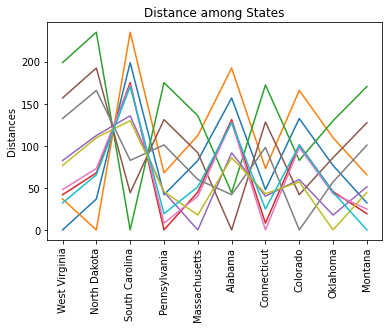

In [9]:
plt.plot(dm)
plt.ylabel('Distances')
plt.grid(False)
plt.xticks(rotation=90)
plt.title('Distance among States')
plt.show()

In [10]:
df_scaled=StandardScaler().fit_transform(df)
df_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [11]:
plt.figure(figsize=(10,8))
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='random',random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

C:\Users\soume\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[200.0, 104.96163315756873, 79.95548163171661, 57.55425863091106, 50.16335813593606, 45.59204161261911, 41.07688067109527, 37.58510967991305, 33.5776424799825, 32.828527476930006]


<Figure size 720x576 with 0 Axes>

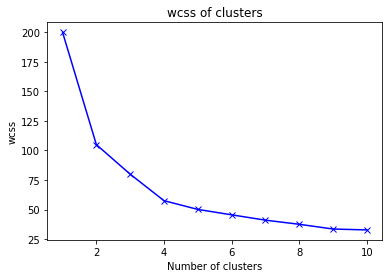

In [12]:
plt.plot(range(1,11),wcss,'bx-')
plt.title('wcss of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
kmeans=KMeans(n_clusters=4)
clusters=kmeans.fit_predict(df_scaled)
clusters

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 0, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3])

In [14]:
final_clusters=clusters+1
cluster=list(final_clusters)
df['member']=cluster
df

,Murder,Assault,UrbanPop,Rape,member
State,,,,,
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,4
Delaware,5.9,238,72,15.8,4
Florida,15.4,335,80,31.9,1


In [15]:
print(f'sil score(n=4):{silhouette_score(df_scaled,cluster)}')

sil score(n=4):0.33968891433344395


In [22]:
sample_sil=silhouette_samples(df_scaled,cluster)
sample_sil=pd.DataFrame(sample_sil)
sample_sil

,0
0,0.485775
1,0.058252
2,0.415483
3,0.118709
4,0.435559
5,0.326542
6,0.227173
7,0.332977
8,0.258017
9,0.371803


In [24]:
sample_sil.to_csv('C:\\Post Graduate Course in Data Analytics\\MACHINE LEARNING\\UNSUPERVISED LEARNING\\KMEANS CLUSTERING\\Silhoutte_Scores.csv',index=False)

In [25]:
means_list=[]
for i in range(4):
    means_list.append(round(sample_sil[i==clusters].mean(),2))
print(means_list)

[0    0.27
dtype: float64, 0    0.37
dtype: float64, 0    0.39
dtype: float64, 0    0.34
dtype: float64]


In [35]:
sample_sil1=pd.read_csv('C:\\Post Graduate Course in Data Analytics\\MACHINE LEARNING\\UNSUPERVISED LEARNING\\KMEANS CLUSTERING\\Silhoutte_Scores.csv')

In [38]:
sample_sil1=sample_sil1.set_index('State')
sample_sil1

,0
State,
Alabama,0.485775
Alaska,0.058252
Arizona,0.415483
Arkansas,0.118709
California,0.435559
Colorado,0.326542
Connecticut,0.227173
Delaware,0.332977
Florida,0.258017


In [47]:
df=pd.concat([df,sample_sil1],axis=1)
df

,Murder,Assault,UrbanPop,Rape,member,0
State,,,,,,
Alabama,13.2,236,58,21.2,3,0.485775
Alaska,10.0,263,48,44.5,1,0.058252
Arizona,8.1,294,80,31.0,1,0.415483
Arkansas,8.8,190,50,19.5,3,0.118709
California,9.0,276,91,40.6,1,0.435559
Colorado,7.9,204,78,38.7,1,0.326542
Connecticut,3.3,110,77,11.1,4,0.227173
Delaware,5.9,238,72,15.8,4,0.332977
Florida,15.4,335,80,31.9,1,0.258017


In [48]:
df.rename(columns={'0':'sil_score'},inplace=True)

In [49]:
df1

,Murder,Assault,UrbanPop,Rape,member,sil_score
State,,,,,,
Alabama,13.2,236,58,21.2,3,0.485775
Alaska,10.0,263,48,44.5,1,0.058252
Arizona,8.1,294,80,31.0,1,0.415483
Arkansas,8.8,190,50,19.5,3,0.118709
California,9.0,276,91,40.6,1,0.435559
Colorado,7.9,204,78,38.7,1,0.326542
Connecticut,3.3,110,77,11.1,4,0.227173
Delaware,5.9,238,72,15.8,4,0.332977
Florida,15.4,335,80,31.9,1,0.258017


Text(0.5, 1.0, 'ViolinPlot of Silhouette Score')

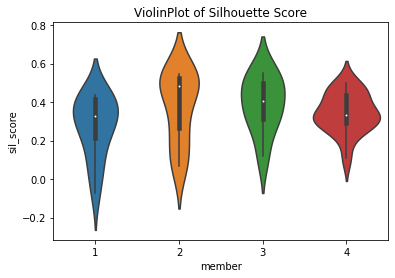

In [50]:
sns.violinplot(x='member',y='sil_score',data=df)
plt.title('ViolinPlot of Silhouette Score')

Text(0.5, 1.0, 'Boxplot of Silhouette Score')

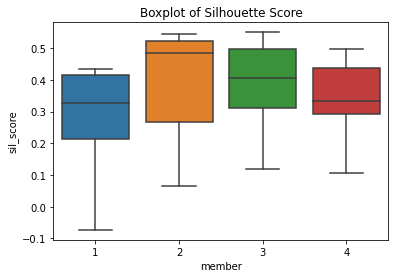

In [51]:
sns.boxplot(x='member',y='sil_score',data=df)
plt.title('Boxplot of Silhouette Score')

In [52]:
df.groupby(df['member']).mean()

,Murder,Assault,UrbanPop,Rape,sil_score
member,,,,,
1,10.815385,257.384615,76.000000,33.192308,0.271057
2,3.600000,78.538462,52.076923,12.176923,0.373407
3,13.937500,243.625000,53.750000,21.412500,0.389179
4,5.656250,138.875000,73.875000,18.781250,0.343312


C:\Users\soume\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Murder', ylabel='Rape'>

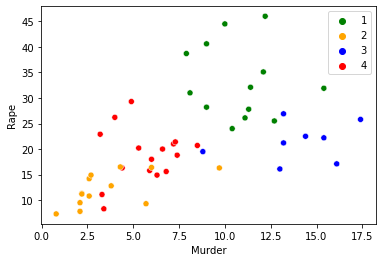

In [53]:
sns.scatterplot(df['Murder'],df['Rape'],hue=final_clusters,palette=['green','orange','blue','red'])

In [54]:
df['member'].value_counts()

4    16
1    13
2    13
3     8
Name: member, dtype: int64

In [57]:
x=df_scaled.copy()
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [63]:
pca=PCA(n_components=4)
pca.fit(x)

PCA(n_components=4)

In [59]:
var=pca.explained_variance_ratio_
var

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [60]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
var1

array([ 62.01,  86.75,  95.66, 100.  ])

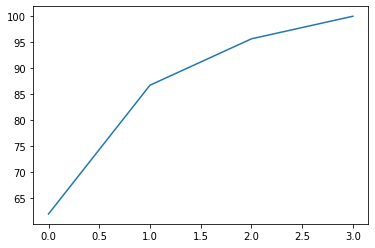

In [61]:
plt.plot(var1)

In [64]:
pca=PCA(n_components=2)
pca.fit(x)
x1=pca.fit_transform(x)
x1

array([[ 0.98556588,  1.13339238],
       [ 1.95013775,  1.07321326],
       [ 1.76316354, -0.74595678],
       [-0.14142029,  1.11979678],
       [ 2.52398013, -1.54293399],
       [ 1.51456286, -0.98755509],
       [-1.35864746, -1.08892789],
       [ 0.04770931, -0.32535892],
       [ 3.01304227,  0.03922851],
       [ 1.63928304,  1.2789424 ],
       [-0.91265715, -1.57046001],
       [-1.63979985,  0.21097292],
       [ 1.37891072, -0.68184119],
       [-0.50546136, -0.15156254],
       [-2.25364607, -0.10405407],
       [-0.79688112, -0.2701647 ],
       [-0.75085907,  0.95844029],
       [ 1.56481798,  0.87105466],
       [-2.39682949,  0.37639158],
       [ 1.76336939,  0.42765519],
       [-0.48616629, -1.4744965 ],
       [ 2.10844115, -0.15539682],
       [-1.69268181, -0.63226125],
       [ 0.99649446,  2.39379599],
       [ 0.69678733, -0.26335479],
       [-1.18545191,  0.53687437],
       [-1.26563654, -0.19395373],
       [ 2.87439454, -0.7756002 ],
       [-2.38391541,

In [66]:
wcss1=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='random',random_state=42)
    kmeans.fit(x1)
    wcss1.append(kmeans.inertia_)
wcss1

C:\Users\soume\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[173.50033658446694,
 78.46232287503089,
 54.229083195741474,
 32.95864311884386,
 26.221601562492886,
 22.160781678630936,
 18.571790031563157,
 17.473335555531353,
 13.617318492898239,
 13.483671617524985]

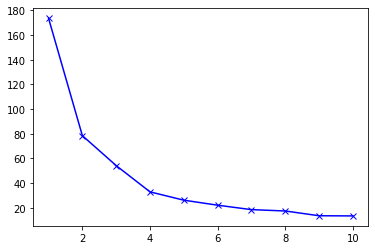

In [67]:
plt.plot(range(1,11),wcss1,'bx-')
plt.show()

In [71]:
kmeans=KMeans(n_clusters=4)
clusters=kmeans.fit_predict(x1)
clusters

array([2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [69]:
df.to_csv('C:\\Post Graduate Course in Data Analytics\MACHINE LEARNING\\UNSUPERVISED LEARNING\\KMEANS CLUSTERING\\Predicted Dataset.csv')